In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

In [2]:
final = pd.read_csv('./Clean/modified_flyball.csv', dtype={'game_state': str})

In [3]:
final[final['almost_caught'] == 1].describe()

,play_id,at_bat,play_per_game,end_time,almost_caught,start_time,inning,player_id,field_x,field_y,...,p1_y,p2_x,p2_y,initial_angle,angle_error,straight_line,route_efficiency,max_player_speed,actual_time,handedness_encode
count,567.000000,546.000000,567.000000,5.670000e+02,567.0,5.670000e+02,567.000000,506.000000,567.000000,567.000000,...,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,144.633157,38.351648,145.712522,5.076244e+06,1.0,5.072529e+06,4.712522,2986.108696,5.000672,272.076664,...,268.700525,4.304299,251.099139,171.536034,120.120645,70.428331,0.810107,13.486310,3.714975,0.529101
std,87.644859,22.641704,88.214485,4.505806e+06,0.0,4.505741e+06,2.705883,2996.534920,98.092368,28.861270,...,44.867474,97.542712,42.651389,124.903805,111.295051,25.736517,0.124207,3.335785,0.838874,0.499593
min,1.000000,1.000000,1.000000,3.884200e+04,1.0,3.444200e+04,0.000000,337.000000,-170.327100,215.280300,...,116.998600,-207.448400,131.477500,0.642767,0.290073,5.351997,0.088609,4.293414,2.376000,0.000000
25%,75.000000,20.000000,76.000000,2.347664e+06,1.0,2.343764e+06,3.000000,513.000000,-109.304250,247.899300,...,245.419200,-79.237800,224.843950,43.942905,23.533138,50.397753,0.756031,11.112522,3.168000,0.000000
50%,141.000000,38.000000,142.000000,4.727576e+06,1.0,4.724126e+06,5.000000,963.000000,-3.611400,263.344200,...,267.234500,-0.232600,250.427000,168.811200,75.591588,69.608417,0.832124,12.877761,3.500000,1.000000
75%,214.000000,56.000000,215.000000,7.329123e+06,1.0,7.325248e+06,7.000000,5007.000000,118.544700,300.751050,...,303.216350,94.492650,274.597700,295.565017,218.831752,88.516089,0.895189,16.059856,4.050000,1.000000
max,412.000000,103.000000,414.000000,8.299257e+07,1.0,8.298792e+07,11.000000,9957.000000,160.273800,333.480000,...,404.293100,221.769500,403.667000,359.658033,354.601526,151.203139,0.994442,20.883444,7.750000,1.000000


Text(0, 0.5, 'Route Efficiency')

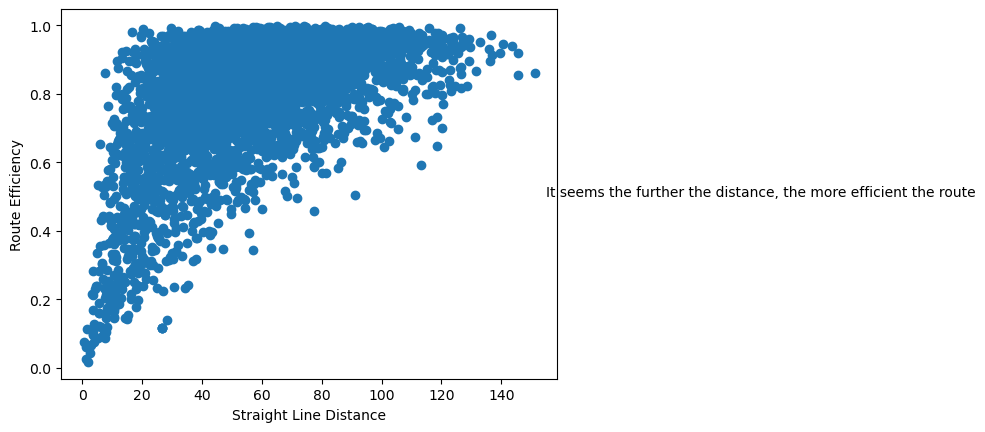

In [4]:
plt.scatter(final['straight_line'], final['route_efficiency'])
ax = plt.gca()
ax.text(155, 0.5, 'It seems the further the distance, the more efficient the route')
plt.xlabel('Straight Line Distance')
plt.ylabel('Route Efficiency')

In [5]:
final.query('route_efficiency < 0.1')
# Some plays I saw are where the outfielder overshoots the ball but then goes in to make a throw.

,game_str,play_id,at_bat,play_per_game,end_time,player_position,event_code,almost_caught,start_time,player_position_hit,...,p2_x,p2_y,initial_angle,angle_error,straight_line,route_efficiency,max_player_speed,actual_time,league,handedness_encode
126,1883_006_Vis4AC_Home4A,96,24.0,96,2878321,CF,Fielded,0,2873121,BA,...,-17.7272,342.3119,45.791016,4.702499,7.080316,0.095886,15.628336,5.200,Home4A,0
235,1883_011_Vis3AB_Home3A,124,34.0,124,4541421,RF,Fielded,0,4537271,BA,...,114.2800,256.5665,139.359293,108.664630,1.279966,0.060213,12.877761,4.150,Home3A,1
363,1883_014_Vis4AE_Home4A,35,8.0,36,927841,CF,Fielded,0,921591,BA,...,-18.3059,304.9438,302.047536,139.774352,1.898877,0.017571,12.684360,6.250,Home4A,1
568,1883_025_Vis1AG_Home1A,241,70.0,243,8816530,LF,Fielded,0,8810623,BA,...,-120.5407,246.0292,17.250944,96.366891,3.609961,0.098140,19.362581,5.907,Home1A,1
779,1883_035_Vis1AI_Home1A,18,6.0,18,642942,CF,Fielded,0,637192,BA,...,5.9825,317.1905,85.079257,80.006856,7.451722,0.088759,12.877761,5.750,Home1A,1
1330,1884_008_Vis1AK_Home1A,4,22.0,4,93078,RF,Ball Deflection,1,88778,BA,...,118.6403,232.6553,86.909674,228.803960,5.351997,0.088609,14.954981,4.300,Home1A,1
1992,1884_035_Vis1AO_Home1A,185,63.0,189,8084018,RF,Fielded,0,8078618,BA,...,144.9923,264.6866,18.489673,247.282088,1.220616,0.025313,9.825990,5.400,Home1A,1
3115,1884_091_Vis1AV_Home1A,223,61.0,229,8317424,LF,Fielded,0,8313674,BA,...,-136.5610,242.0959,214.219169,34.373417,4.031383,0.076449,10.149232,3.750,Home1A,1
3493,1884_107_Vis3AR_Home3A,43,13.0,43,1691334,RF,Fielded,0,1688584,BA,...,131.4325,252.2254,297.349140,15.670791,0.559089,0.075846,9.555995,2.750,Home3A,0
3711,1884_116_Vis1BA_Home1A,104,32.0,109,3498024,CF,Fielded,0,3492424,BA,...,-5.4535,288.7807,14.822639,259.966768,3.520492,0.095094,11.026888,5.600,Home1A,0


In [6]:
final['game_state'] = final['game_state'].astype('category')
final['player_position'] = final['player_position'].astype('category')
final['game_state_encode'] = final['game_state'].cat.codes
final['position_encode'] = final['player_position'].cat.codes

In [7]:
final.columns

Index(['game_str', 'play_id', 'at_bat', 'play_per_game', 'end_time',
       'player_position', 'event_code', 'almost_caught', 'start_time',
       'player_position_hit', 'inning', 'game_state', 'player_id', 'field_x',
       'field_y', 'handedness', 'ball_position_x', 'ball_position_y',
       'ball_position_z', 'exit_velocity', 'launch_angle', 'field_end_x',
       'field_end_y', 'actual_distance', 'max_speed', 'mean_speed', 'p1_x',
       'p1_y', 'p2_x', 'p2_y', 'initial_angle', 'angle_error', 'straight_line',
       'route_efficiency', 'max_player_speed', 'actual_time', 'league',
       'handedness_encode', 'game_state_encode', 'position_encode'],
      dtype='object')

# Univariate Selection

Use some of these https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py


For model interpretability: https://scikit-learn.org/stable/auto_examples/model_selection/index.html

In [131]:
from sklearn.feature_selection import SelectKBest,f_regression, mutual_info_regression, SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [132]:
features = ['game_state_encode', 'max_player_speed',
           'launch_angle', 'exit_velocity', 'initial_angle',
            'mean_speed', 'handedness_encode', 'angle_error']
target = ['p1_y']

X = final[features]
y = final[target]


In [122]:
SelectKBest(score_func=mutual_info_regression, k = 5).fit(X, y).get_feature_names_out(input_features=features)



/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['max_player_speed', 'launch_angle', 'exit_velocity',
       'initial_angle', 'angle_error'], dtype=object)

In [123]:
features = ['max_player_speed', 'launch_angle', 'exit_velocity',
       'initial_angle', 'game_state_encode']
X = final[features]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)


In [134]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [135]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('RMSE: %.2f'%  np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 1390.75
RMSE: 37.29
R^2: 0.06


In [136]:
print("Coefficients\n", features, '\n', reg.coef_)

Coefficients
 ['game_state_encode', 'max_player_speed', 'launch_angle', 'exit_velocity', 'initial_angle', 'mean_speed', 'handedness_encode', 'angle_error'] 
 [[ 5.19356362e-01  3.41837038e-01 -2.53180751e-01  6.84022050e-01
  -1.09261160e-03  1.95783554e-01 -1.86303982e+00  1.29363612e-03]]


In [137]:
model = XGBRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [138]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: %.2f' %  np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error: %.3f' % mean_absolute_error(y_test, y_pred))
print("R^2: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 1331.51
Root Mean Squared Error: 36.49
Mean Absolute Error: 28.510
R^2: 0.10


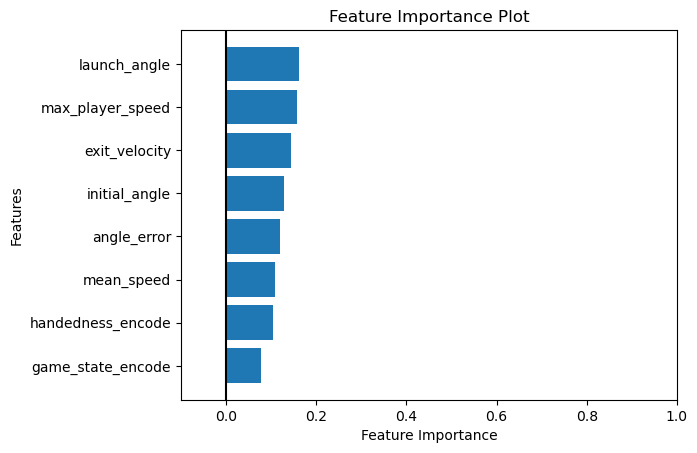

In [139]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
features = X.columns[sorted_idx]

plt.figure()
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.axvline(x=0, color='black')
plt.xlim(-.1, 1)
plt.show()

In [140]:
y_test

,p1_y
157,316.0289
3564,288.7871
1482,306.3526
3277,230.8816
1018,264.7850
...,...
2189,295.6846
3468,245.8381
1551,292.4015
4338,223.3330


In [141]:
y_pred

array([279.5057 , 260.1871 , 301.09753, 296.5725 , 268.7442 , 253.34003,
       321.2626 , 303.1624 , 272.8635 , 306.4846 , 261.954  , 316.31668,
       269.77954, 281.41052, 276.88202, 285.65158, 298.2532 , 243.72649,
       297.4378 , 297.80377, 286.41937, 271.75058, 241.29704, 285.5152 ,
       304.63998, 282.69006, 270.91595, 267.42148, 263.5269 , 228.49554,
       297.81543, 294.73904, 232.0608 , 296.6473 , 342.90314, 262.7997 ,
       251.41978, 255.68544, 288.98392, 293.3531 , 237.56631, 276.78415,
       266.8306 , 286.13266, 244.97556, 240.08176, 284.4049 , 251.18132,
       273.9083 , 324.78714, 332.81546, 278.09683, 250.40204, 300.37897,
       301.5265 , 240.04466, 254.09076, 302.7678 , 295.46503, 262.96445,
       294.82166, 258.36166, 299.6175 , 238.31163, 283.04907, 248.50116,
       269.24268, 290.4626 , 288.12308, 274.59213, 280.0974 , 243.02507,
       333.57886, 254.81311, 250.12381, 275.27512, 280.17487, 221.99045,
       272.33887, 268.66006, 240.89528, 246.73848, 